In [1]:
#import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imread, imshow, subplots, show

#rom sklearn.metrics import RocCurveDisplay

In [2]:
# Load the subset from the file
data = np.load('Tomato_balanced.npz')
X_train_balanced = data['X_train_balanced']
y_train_balanced = data['y_train_balanced']

In [3]:
# Load the subset from the file
data = np.load('Tomato_test.npz')
X_test = data['X_test']
y_test = data['y_test']

In [4]:
# Load the subset from the file
data = np.load('Tomato_val.npz')
X_val = data['X_val']
y_val= data['y_val']

In [5]:
class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']


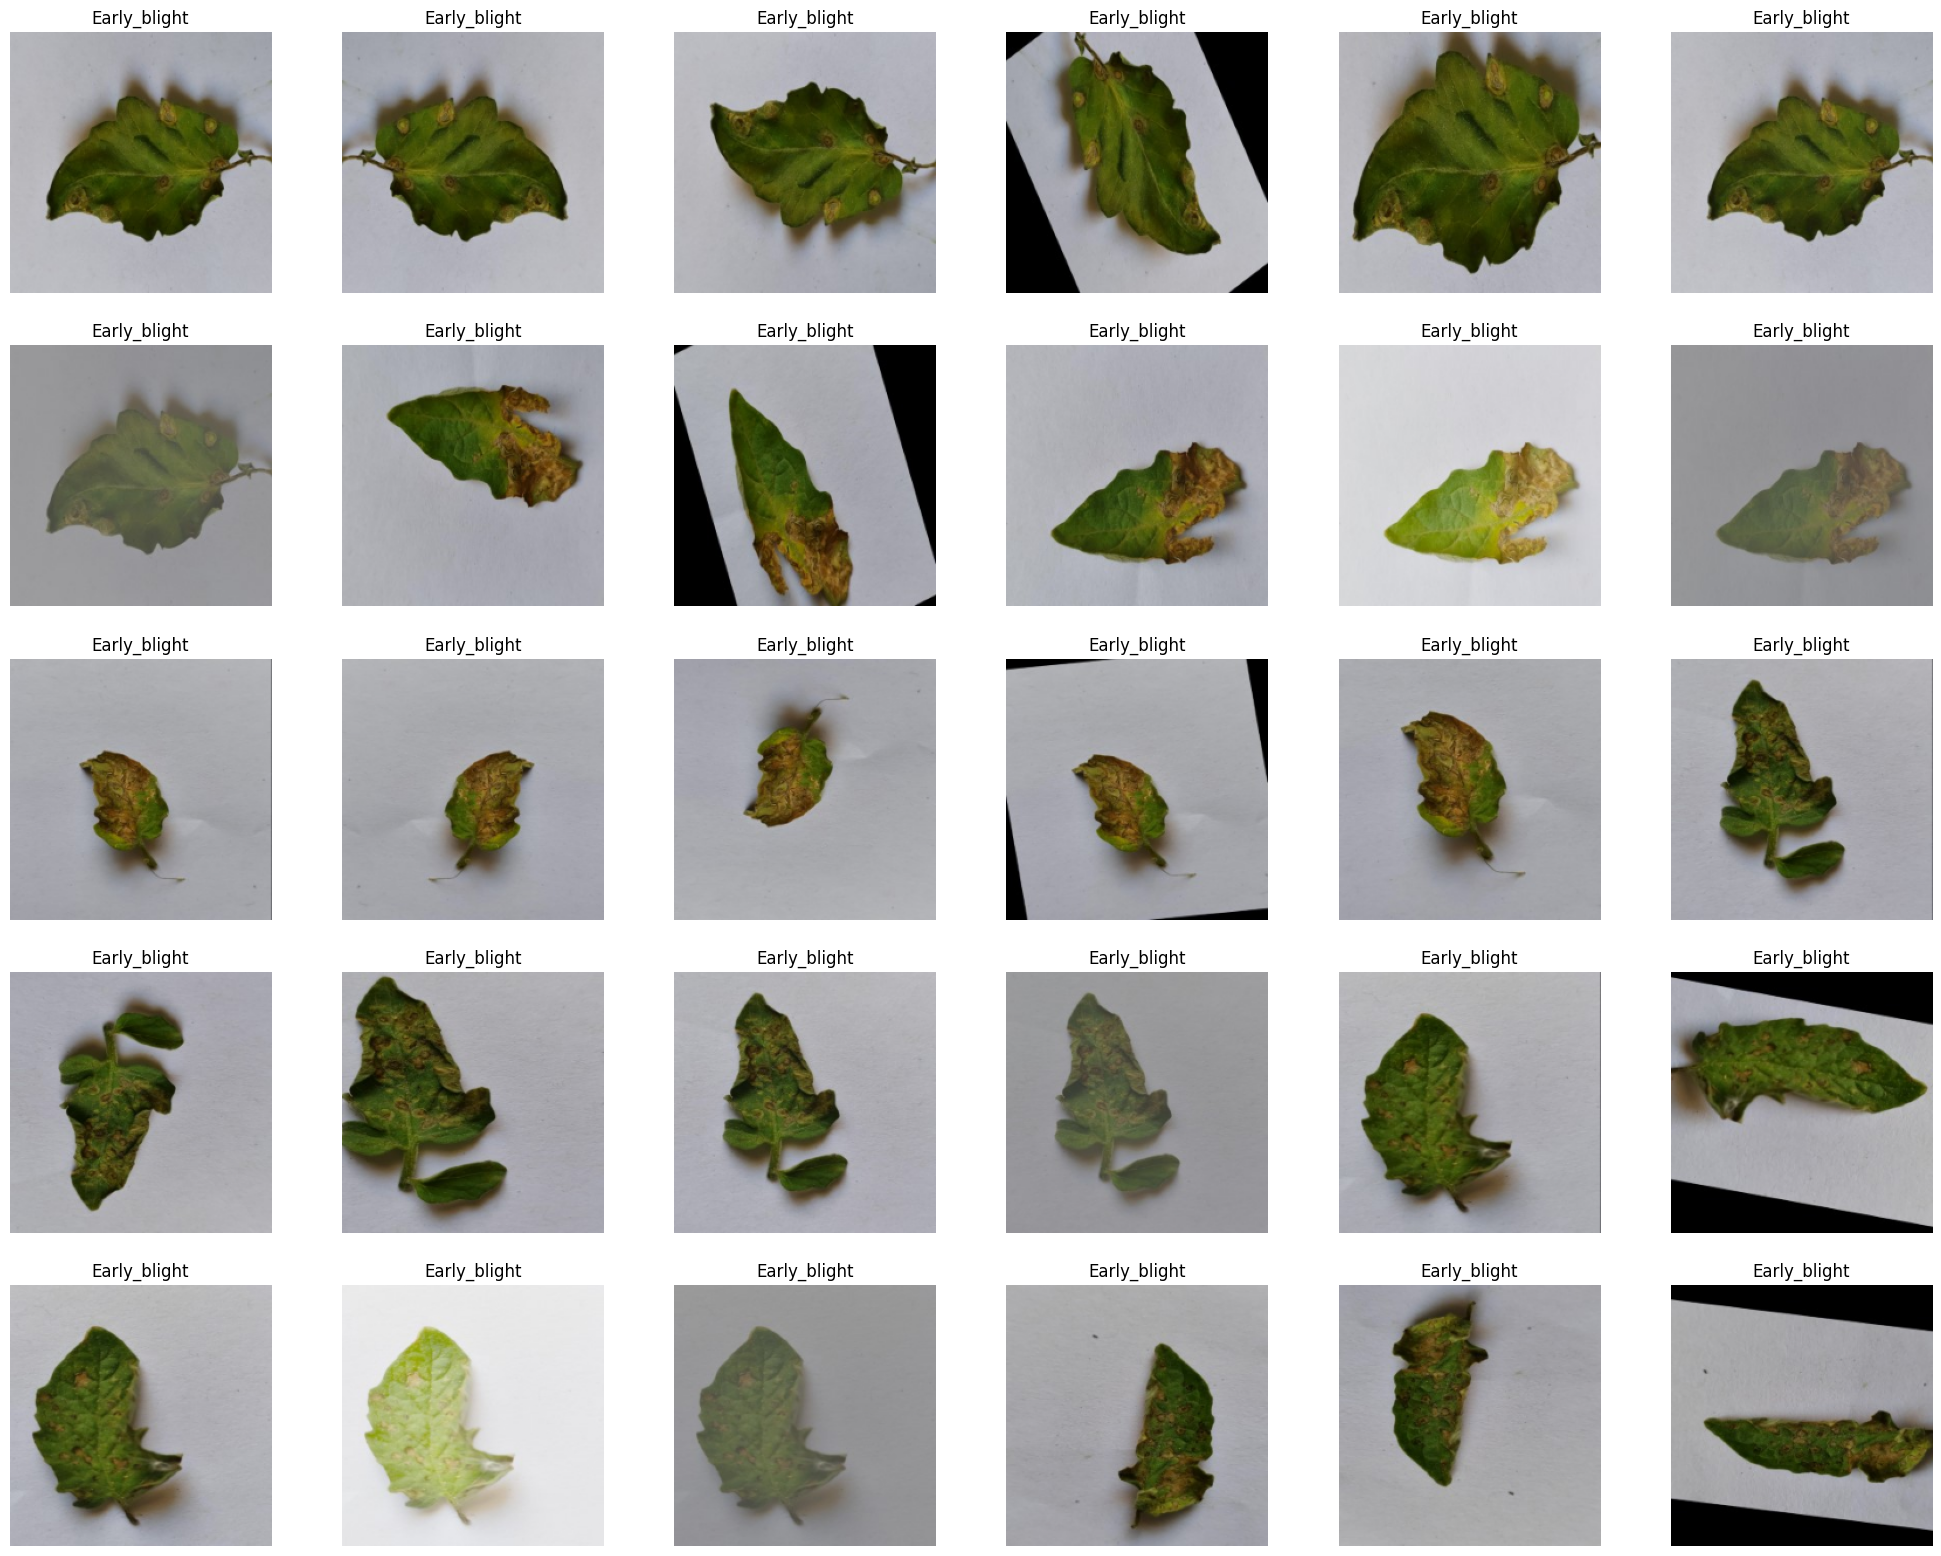

In [6]:
plt.figure(figsize=(25,40))
for i in range(30):
    plt.subplot(10,6,i+1)
    plt.imshow(X_train_balanced[i])
    plt.title(class_labels[y_train_balanced[i]])
    plt.axis("off")

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152, MobileNet, VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Activation, Flatten,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(8, activation='softmax'),
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [9]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(
                          from_logits=False,
                          name='sparse_categorical_crossentropy'),
             metrics = ['accuracy'])

In [10]:
import time
start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_val, y_val), batch_size=16, epochs=50)
end = time.time()
total_time = end - start

Epoch 1/50
266/266 [==============================] - 15s 21ms/step - loss: 1.6477 - accuracy: 0.3281 - val_loss: 1.6478 - val_accuracy: 0.3891
Epoch 2/50
266/266 [==============================] - 5s 18ms/step - loss: 1.2411 - accuracy: 0.5299 - val_loss: 1.3448 - val_accuracy: 0.5011
Epoch 3/50
266/266 [==============================] - 5s 18ms/step - loss: 0.9947 - accuracy: 0.6376 - val_loss: 1.2719 - val_accuracy: 0.5621
Epoch 4/50
266/266 [==============================] - 5s 18ms/step - loss: 0.8906 - accuracy: 0.6780 - val_loss: 1.1544 - val_accuracy: 0.5554
Epoch 5/50
266/266 [==============================] - 5s 18ms/step - loss: 0.8170 - accuracy: 0.6893 - val_loss: 1.0539 - val_accuracy: 0.5987
Epoch 6/50
266/266 [==============================] - 5s 18ms/step - loss: 0.7437 - accuracy: 0.7246 - val_loss: 0.9855 - val_accuracy: 0.6286
Epoch 7/50
266/266 [==============================] - 5s 18ms/step - loss: 0.6903 - accuracy: 0.7406 - val_loss: 1.0513 - val_accuracy: 0.604

In [11]:
print(f"Total time taken for fitting: {total_time:.2f} sec")

Total time taken for fitting: 276.04 sec


In [12]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 19ms/step - loss: 2.4341 - accuracy: 0.6811


[2.4341394901275635, 0.6811279654502869]

Text(0.5, 1.0, 'Training and Validation Accuracy')

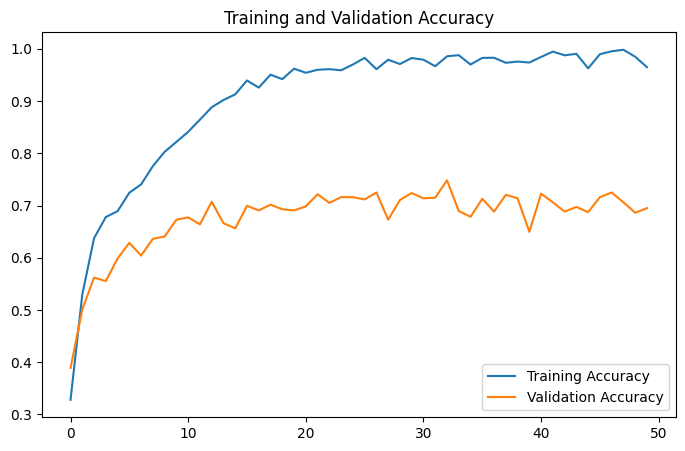

In [13]:
epochs =50

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

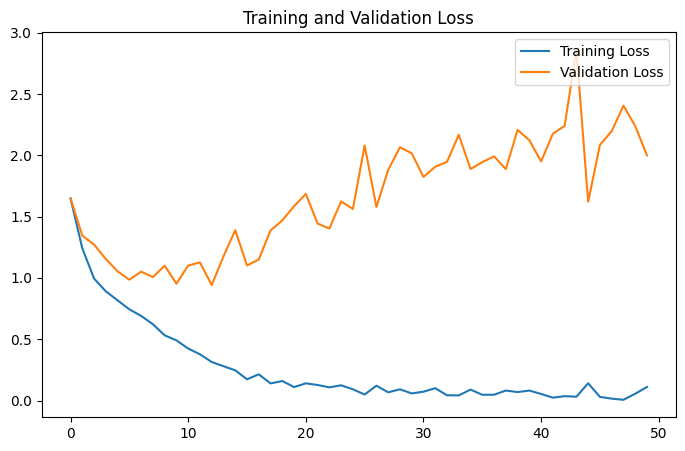

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(X_test) #### 3-dimentional

y_pred1 = np.array(list(map(lambda x: np.argmax(x), y_pred))) #pred_prob = np.argmax(y_pred, axis=1) ## 1-dimentional
    
report = classification_report(y_test, y_pred1)
    
print(report)

              precision    recall  f1-score   support

           0       0.76      0.52      0.62        50
           1       0.31      0.41      0.35        22
           2       0.75      0.82      0.78        92
           3       0.68      0.67      0.68       104
           4       0.74      0.82      0.78        95
           5       0.73      0.73      0.73        37
           6       0.75      0.38      0.50         8
           7       0.54      0.49      0.51        53

    accuracy                           0.68       461
   macro avg       0.66      0.60      0.62       461
weighted avg       0.69      0.68      0.68       461



In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, RocCurveDisplay, recall_score, f1_score
from sklearn.metrics import precision_score

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
precision_per_class = precision_score(y_test, y_pred1, average=None)
f1_per_class = f1_score(y_test, y_pred1, average=None)

# Print metrics as percentages rounded to 2 decimal places
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print precision and F1 score per class, rounded to 2 decimal places as percentages
print(f"Precision per Class: {[round(p * 100, 2) for p in precision_per_class]}%")
print(f"F1 Score per Class: {[round(f * 100, 2) for f in f1_per_class]}%")

SVM Test Accuracy: 68.11%
Precision: 68.62%
Recall: 68.11%
F1 Score: 67.88%
Precision per Class: [76.47, 31.03, 75.0, 67.96, 73.58, 72.97, 75.0, 54.17]%
F1 Score per Class: [61.9, 35.29, 78.12, 67.63, 77.61, 72.97, 50.0, 51.49]%


[[26  3  2  7  6  1  1  4]
 [ 1  9  0 12  0  0  0  0]
 [ 0  1 75  2  2  1  0 11]
 [ 3 13  2 70 10  0  0  6]
 [ 2  1  3  5 78  5  0  1]
 [ 0  0  6  0  4 27  0  0]
 [ 0  0  0  0  3  2  3  0]
 [ 2  2 12  7  3  1  0 26]]


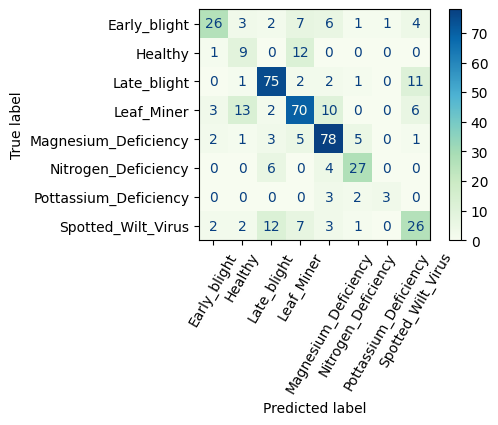

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1)
print(cm)


display_cm = ConfusionMatrixDisplay(cm, display_labels=class_labels)
fig,ax = plt.subplots(figsize=(5,3))
display_cm.plot(cmap='GnBu', ax=ax, xticks_rotation=60)

In [21]:
from sklearn.metrics import roc_curve, auc
import sklearn

sklearn.metrics.roc_auc_score(y_test, y_pred, multi_class='ovr')

0.9093439789696175

In [22]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred1)

0.6155194716775598

In [23]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

2.25795505701225

In [24]:
from tensorflow.keras.utils import to_categorical
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

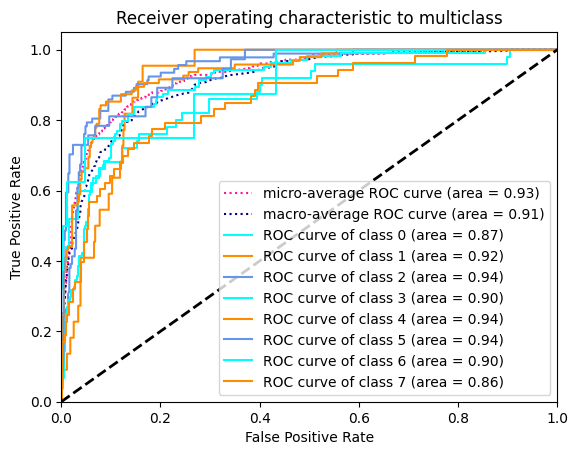

In [25]:
n_classes=8
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
from itertools import cycle
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



##### Plot all ROC curves ######


plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="dotted",
    linewidth=1.5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="dotted",
    linewidth=1.5,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1.5,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [26]:
# For TensorFlow/Keras models
model.save("CNN.h5")
print("Model saved to CNN.h5")


Model saved to CNN.h5


In [27]:
from tensorflow.keras.models import load_model

# Load the  model
loaded_CNN = load_model("CNN.h5")
print("Model loaded from CNN.h5")

Model loaded from CNN.h5



Image Index: 363


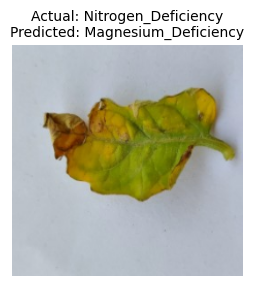


Image Index: 245


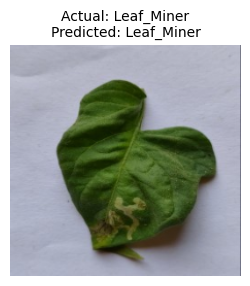


Image Index: 458


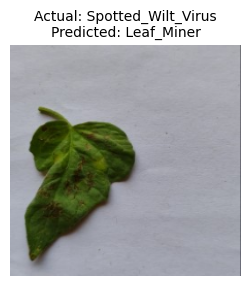


Image Index: 311


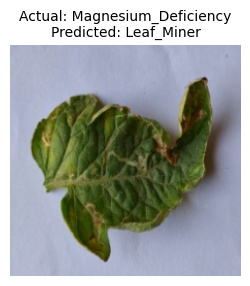


Image Index: 11


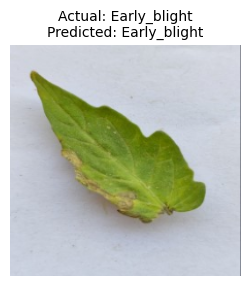


Image Index: 243


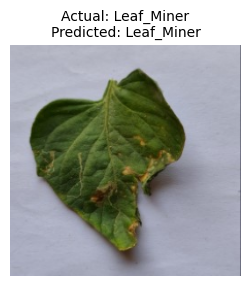


Image Index: 346


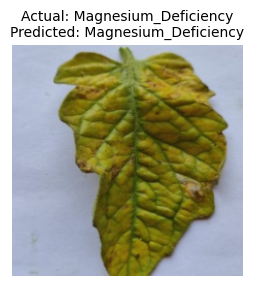


Image Index: 429


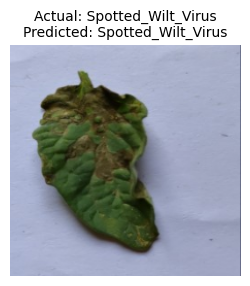


Image Index: 174


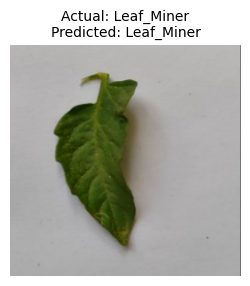


Image Index: 300


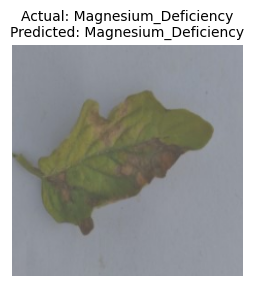


Image Index: 381


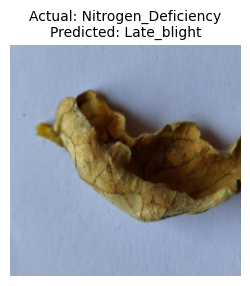


Image Index: 169


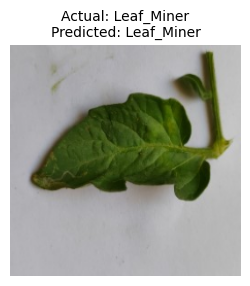


Image Index: 424


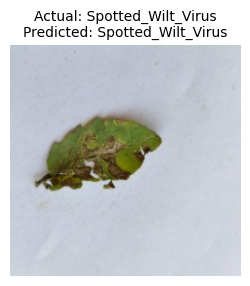


Image Index: 207


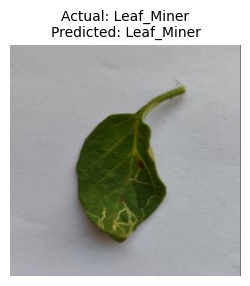


Image Index: 254


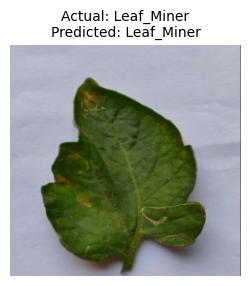


Image Index: 51


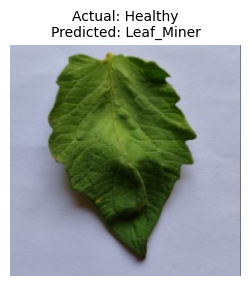


Image Index: 396


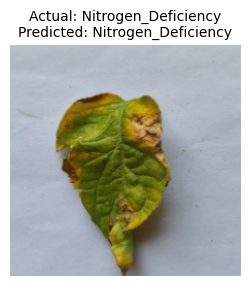


Image Index: 54


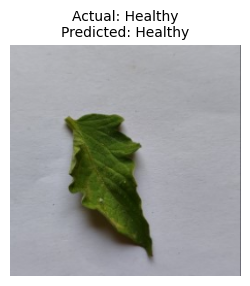


Image Index: 234


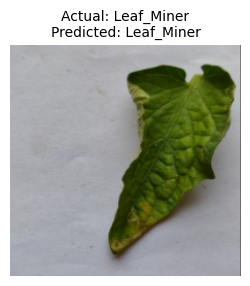


Image Index: 10


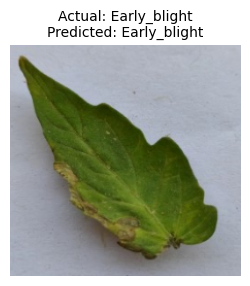

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Select 20 random indices from the test set
random_indices = random.sample(range(len(X_test)), 20)

class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']

# Loop through the randomly selected indices
for index in random_indices:
    # Select the test image and its corresponding actual label
    test_image = X_test[index]
    actual_label_index = y_test[index]  # Assuming y_test contains the actual labels as indices

    # Add a batch dimension (required by the CNN model)
    test_image_batch = np.expand_dims(test_image, axis=0)  # Shape becomes (1, 224, 224, 3)

    # Predict the class probabilities for the image
    predictions = loaded_CNN.predict(test_image_batch)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the actual and predicted class labels
    actual_label = class_labels[actual_label_index]
    predicted_label = class_labels[predicted_class_index]

    # Display the image with Matplotlib
    plt.figure(figsize=(3, 3))  # Set figure size

    # If the image is normalized, scale it back to the range [0, 255] for display
    if test_image.max() <= 1.0:
        display_image = test_image * 255  # Rescale to [0, 255]
    else:
        display_image = test_image  # If already in [0, 255], keep it as is

    # Display the image
    print()
    print(f"Image Index: {index}")
    plt.imshow(display_image.astype('uint8'))  # Convert to uint8 for correct display
    plt.axis('off')  # Turn off axis
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)  # Add title
    plt.show()
